In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df=pd.read_csv('books.csv')

In [4]:
print(df)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [5]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
df.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [7]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
df.shape

(550, 7)

In [9]:
df.isnull()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [13]:
df['Price'].fillna(df['Price'].median(), inplace=True)
df.dropna(inplace=True)

/var/folders/t1/2qjgvqr17479p2c12zg26rww0000gn/T/ipykernel_1125/2175565592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].median(), inplace=True)


In [14]:
df['Price'] = df['Price'].astype(float)
df['Reviews'] = df['Reviews'].astype(int)

/var/folders/t1/2qjgvqr17479p2c12zg26rww0000gn/T/ipykernel_1125/1582477418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Genre', palette='viridis', order=df['Genre'].value_counts().index)


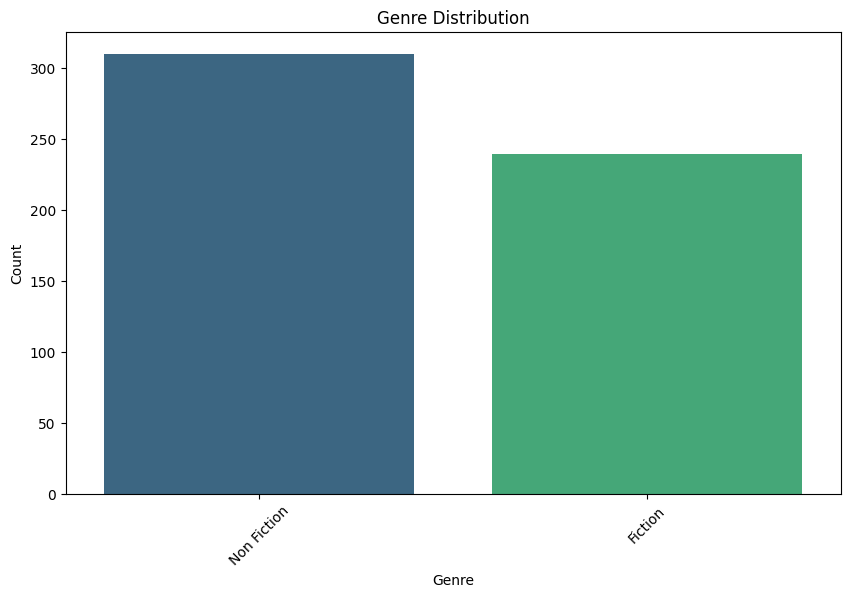

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre', palette='viridis', order=df['Genre'].value_counts().index)
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

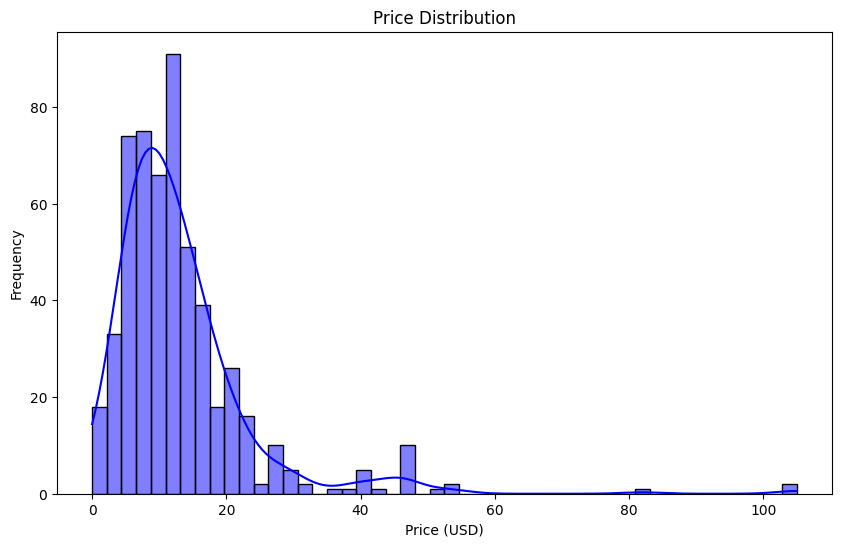

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

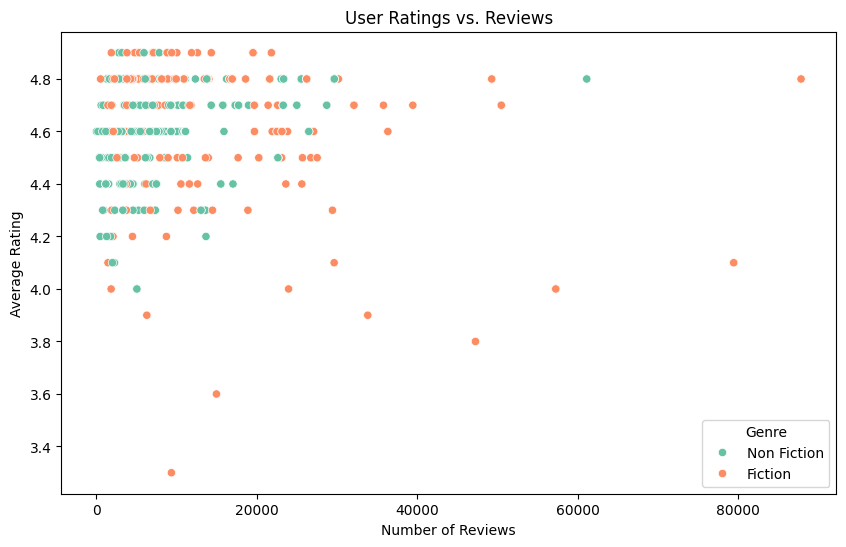

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='User Rating', hue='Genre', palette='Set2')
plt.title("User Ratings vs. Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.legend(title="Genre")
plt.show()

In [31]:
text = " ".join(df['Name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

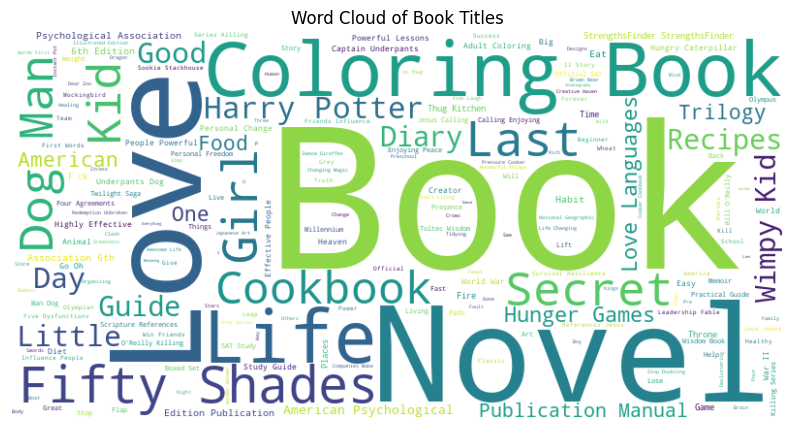

In [32]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Book Titles")
plt.show()

/var/folders/t1/2qjgvqr17479p2c12zg26rww0000gn/T/ipykernel_1125/523891727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='coolwarm', order=sorted(df['Year'].unique()))


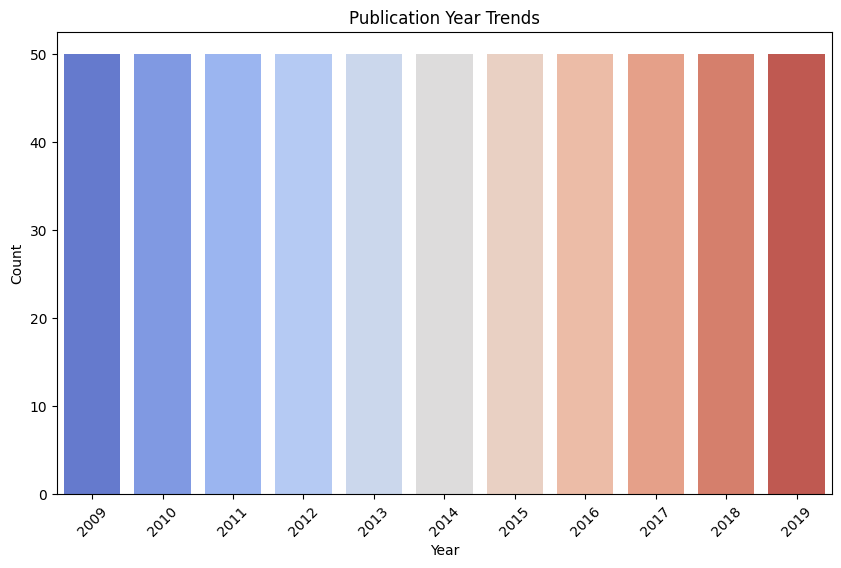

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', palette='coolwarm', order=sorted(df['Year'].unique()))
plt.title("Publication Year Trends")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

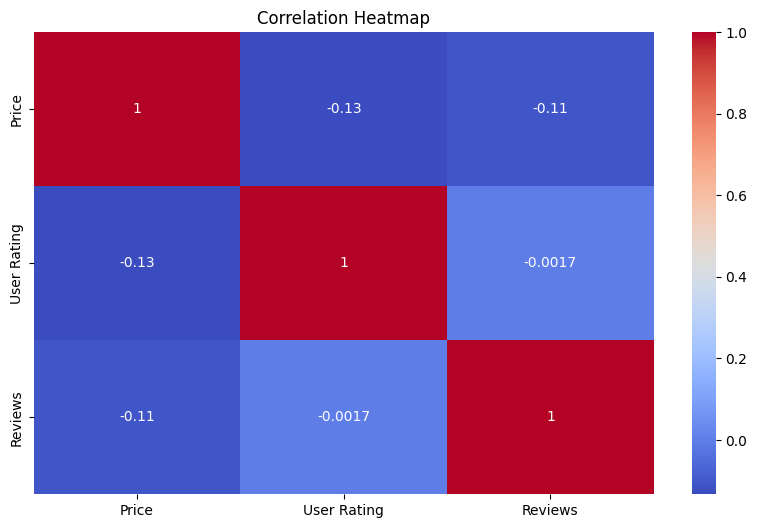

In [37]:
plt.figure(figsize=(10, 6))
correlation = df[['Price', 'User Rating', 'Reviews']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [39]:
top_genres = df['Genre'].value_counts().head()
print("Top 5 Genres:\n", top_genres)

Top 5 Genres:
 Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64


In [40]:
avg_price = df.groupby('Genre')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price by Genre:\n", avg_price)


Average Price by Genre:
 Genre
Non Fiction    14.841935
Fiction        10.850000
Name: Price, dtype: float64


In [41]:
popular_year = df['Year'].value_counts().idxmax()
print(f"\nMost books were published in the year: {popular_year}")


Most books were published in the year: 2016
